# Lab | Random variable distributions

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [19]:
def std_col_names(data):
    '''function to standardize column_names'''  
    
    import re
    data_c = data.copy()
    
    #changing header names
    cols = []
    #lowering cases and replacing space with underscore
    for i in data_c.columns: cols.append(re.sub('([a-z])([A-Z])', r'\1_\2', i).replace(' ','_').lower())
        # re.sub('([a-z])([A-Z])', r'\1_\2', i) e.g.: EmploymentStatus (no space between words)
        # replace(' ','_') e.g.: Effective To Date
        # lower() lower all word characters
    data_c.columns = cols 
    
    return data_c

data = std_col_names(data)

### 1. Get the numerical variables from our dataset.

In [22]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [23]:
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(object)

### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

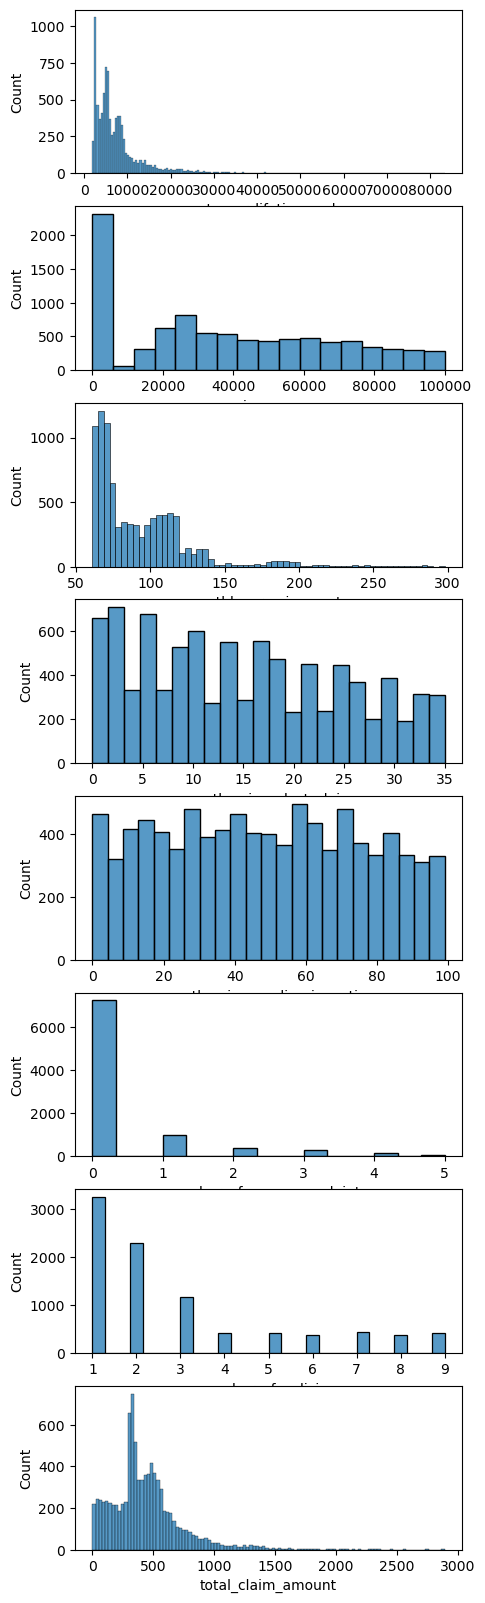

In [30]:
fig,ax = plt.subplots(8,1, figsize=(5,20))
n=0
for i in data_num.columns:
    sns.histplot(data_num[i], ax = ax[n])
    n += 1

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [37]:
from sklearn.preprocessing import PowerTransformer

t = PowerTransformer()
t.fit(data_num)

data_num_pt = t.transform(data_num)
data_num_pt = pd.DataFrame(data_num_pt, columns = data_num.columns )

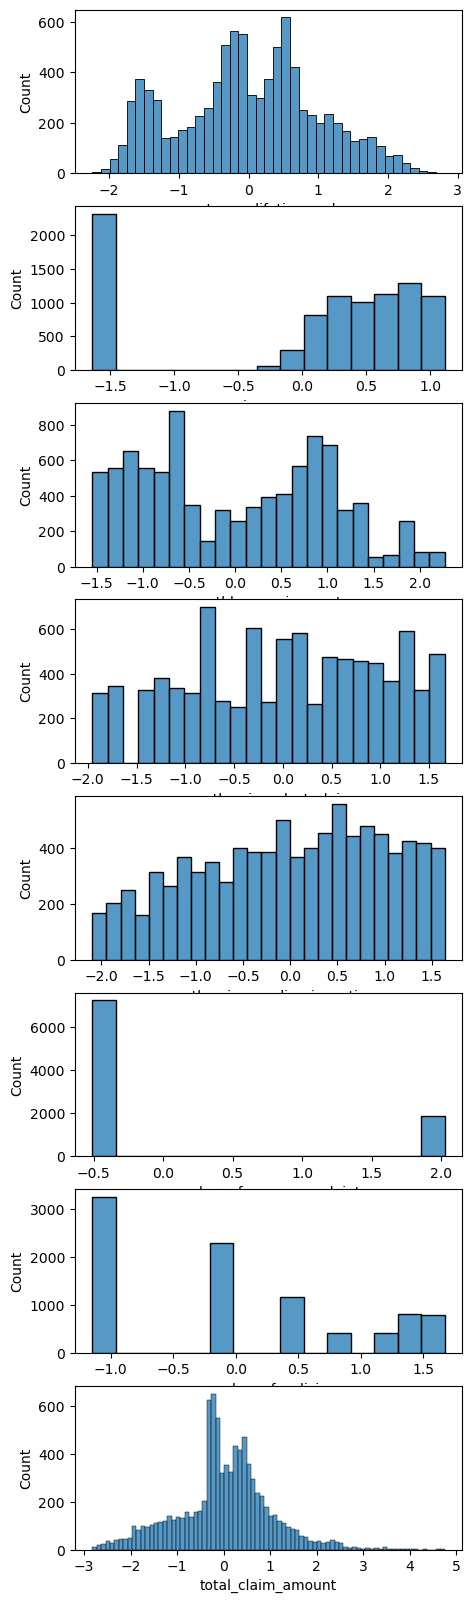

In [38]:
fig,ax = plt.subplots(8,1, figsize=(5,20))
n=0
for i in data_num.columns:
    sns.histplot(data_num_pt[i], ax = ax[n])
    n += 1

In [39]:
from sklearn.preprocessing import Normalizer

n = Normalizer()
n.fit(data_num)

data_num_n = n.transform(data_num)
data_num_n = pd.DataFrame(data_num_n, columns = data_num.columns )

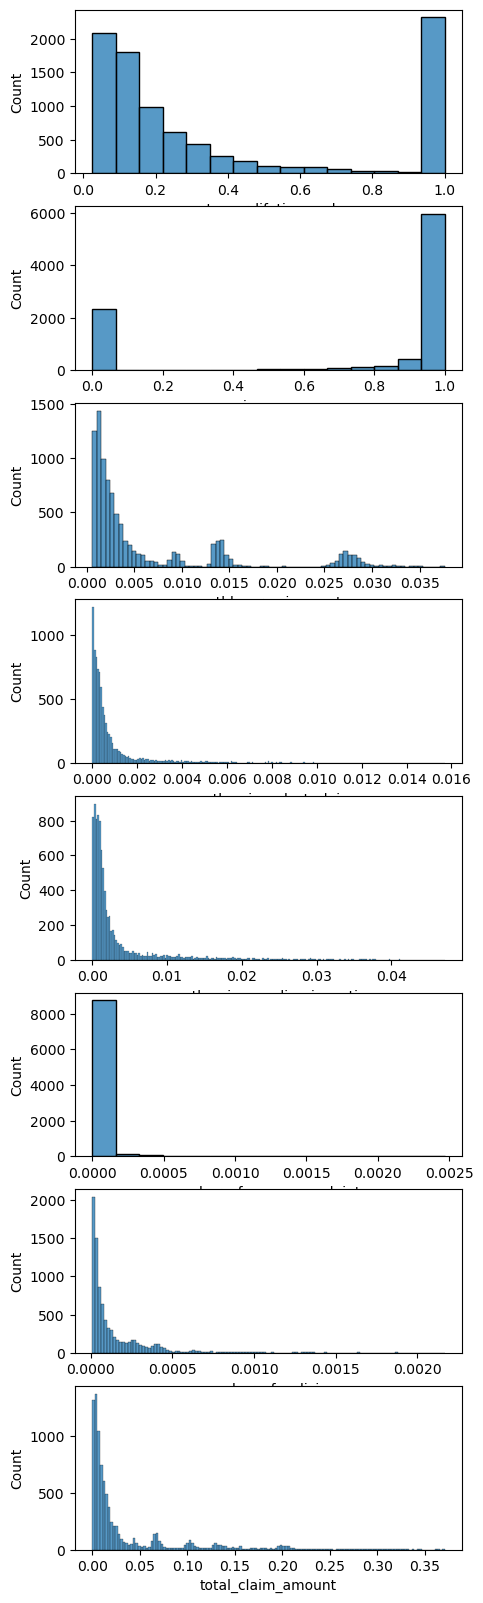

In [40]:
fig,ax = plt.subplots(8,1, figsize=(5,20))
n=0
for i in data_num.columns:
    sns.histplot(data_num_n[i], ax = ax[n])
    n += 1